[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t2_case_study.ipynb)


# Introduction to Data Analysis with the Resale Price Prediction Dataset

The lecture introduced you to the problem of resale price forecasting to support decision-making in the leasing business. In this tutorial, we will explore the resale price prediction in more detail by going through the various stages of the machine learning process, from initial data exploration and explanatory data analysis (EDA) to sophisticated predictive modeling and insightful post-hoc analysis. The purpose of this notebook is to give you a feeling of how a standard (supervised) ML workflow looks like in Python.

Here's a brief overview of what you'll encounter in this tutorial:

1. Data Exploration: We start our journey by diving into Exploratory Data Analysis (EDA), where we'll see how to use visual and statistical methods to understand our data's main characteristics. This foundational step helps us discern the story our data tells, guiding our subsequent steps.
   
2. Explanatory Modeling: Next, we transition into building an explanatory model, where we'll create and assess a regression model to understand the relationships within our data. This process involves not just building the model but also interpreting the results, providing us with valuable insights into the dataset's features.

3. Predictive Modeling: Armed with insights from our explanatory model, we'll move into predictive modeling. Here, the aim shifts to creating models that can predict new outcomes based on the data. We'll employ two different approaches – a Linear Regression model using sklearn and a gradient boosting model using XGBoost – to harness the power of these advanced algorithms.
   
4. Post-hoc Analysis: After our models are built and validated, we'll delve into post-hoc analysis, dissecting the models' decisions and interpreting their significance. This stage enhances our understanding of model behavior and the importance of different features, reinforcing the concept that effective machine learning involves both prediction and interpretation.
   
5. Exercises: Lastly, you'll find a section of exercises designed to test your understanding and reinforce the concepts discussed. These practical challenges encourage you to engage directly with the code and concepts, solidifying your learning experience.

As we proceed, remember that this notebook isn't just a place to read code – it's an interactive environment where you can run cells, alter code, and see the results immediately. You're encouraged to play around, make mistakes, ask questions, and most importantly, enjoy the process of discovery.

Certainly, you are going to encounter many new concepts throughout this tutorial, and it's completely natural to feel overwhelmed at times. We do not expect you to understand everything right away. In fact, many future tutorial sessions are designed to delve into the individual components and concepts introduced here, providing a more detailed foundation and context to enhance your comprehension. This notebook is just the beginning; it's a launchpad that will propel you into the vast universe of machine learning. So, take everything in stride, stay curious, and remember, every expert was once a beginner. 


---

# Section 1: Data Exploration

Before we dive into complex algorithms and predictive models, it's paramount to understand the data we're working with. This stage, often termed Exploratory Data Analysis (EDA), involves summarizing the main characteristics of datasets through various methods, primarily visual techniques. Here, we'll explore the fundamental aspects of EDA using tools like histograms to understand data distributions, correlation heatmaps to spot any potential relationships or patterns within the data, and more. By the end of this section, you'll have a foundational understanding of your dataset's structure, variables, and the relationships between them, preparing you for the next steps in your machine learning journey.

## Loading  the Resale Price Prediction Dataset

The data we will be working with in this tutorial is the Resale Price Prediction dataset. You can find the dataset on both on our Moodle page and in our GitHub repository. The Resale Price Prediction dataset focuses on laptops that have been leased and returned, aiming to predict their resale prices. The resale price is influenced by various factors, including the original retail price, depreciation, release year, screen size, hard drive size, RAM size, weight, lease duration, and battery capacity. By leveraging these multiple features, the goal is to develop a predictive model that accurately estimates the resale value of laptops, providing valuable insights for effective pricing strategies in the secondary market. 



In [1]:
import pandas as pd  # load Pandas library, the go-to library for working with data sets in Python

# We put the data on the web so you can download it easily
url = 'https://raw.githubusercontent.com/Humboldt-WI/IPML/main/data/resale_price_dataset.csv'

# We will use pandas read_csv method to read data right from the web
data = pd.read_csv(url)

In [2]:
# Please note, you can use the same function to read data from your hard disk.
# This is faster and does not require a working internet connection.
# Here is an example, which assumes that the data file is stored in a sub-folder called data.
# To run the code, simply remove the hashtag 
#data = pd.read_csv('../data/resale_price_dataset.csv')

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with tabular data both easy and intuitive.

Tip: if you get a "ModuleNotFoundError", this means your system doesn't not have a particular python package installed. In order to resolve the issue you need to install the given package using your package manager. In the case of using PyPI/pip as your pacakge manager, simply uncomment the code below:

In [3]:
# !pip install pandas

Let's first take a look at the data. To that end, we use the function `.head()`, which creates a preview of the data.

In [4]:
# The head function is used to display the first few rows of the dataset after it has been loaded into a pandas DataFrame format
data.head()

,Brand,Model,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Industry,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
0,Crest,Elevation Elite,2016,15,512,16,1150,2699,Automotive and Transportation,60,63,87.90,751
1,Crest,Elevation Elite,2016,15,512,16,1150,2719,Healthcare,6,5,95.59,2599
2,Crest,Elevation Elite,2016,15,512,16,1150,2759,Automotive and Transportation,24,27,95.05,1358
3,Crest,Elevation Elite,2016,15,512,16,1150,2639,Automotive and Transportation,36,31,94.66,1166
4,Crest,Elevation Elite,2016,15,512,16,1150,2659,Agriculture and Farming,12,10,89.12,1915


## Descriptive Statistics

As we dive deeper into the vast world of data exploration, it's essential to pause and understand the fundamental attributes of our dataset. Enter the realm of Descriptive Statistics – a powerful tool that provides a concise summary of the main characteristics of our data, offering a quick snapshot and insight without the need to delve into complex visualizations or computations.

Our journey begins with the ```pd.DataFrame.info()``` method, a vital first step that reveals the high-level structure of our dataframe. This function provides us with essential details such as the number of entries (eg, rows), the data types of each feature (ie, column), and the amount of non-null values. Understanding this information is crucial as it sets the stage for further analysis and preprocessing by giving us a clear picture of our dataset's composition, especially concerning data types and missing values.

Next, we'll harness the power of the ```pd.DataFrame.describe()``` method, a convenient Pandas function that computes a suite of summary statistics for each column in our dataset. Whether you're curious about the average resale price of the laptops, the range of RAM sizes, or the variance in battery capacities, describe() offers a comprehensive overview at a glance.

But why are these steps essential? Both ```info()``` and ```describe()``` help us establish a foundational understanding of our dataset's distribution, scale, and tendencies. While ```info()``` gives us a structural overview, ```describe()``` takes us a step further into the statistical nature of each column. By noting aspects like the mean, standard deviation, and various percentiles, we can swiftly detect outliers, identify patterns, and formulate hypotheses for further investigation.

Together, these methods serve as our initial checkpoint, ensuring that we're not only aware of the dataset's composition but also intimately acquainted with its statistical properties. This knowledge is instrumental in guiding our next steps, be it data cleaning, feature selection, or exploratory analysis, as we progress further into our data exploration journey.

In [5]:
data.info() # Obtain information about the structure and characteristics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             5000 non-null   object 
 1   Model                             5000 non-null   object 
 2   Release year                      5000 non-null   int64  
 3   Screen size (inches)              5000 non-null   int64  
 4   Hard drive size (GB)              5000 non-null   int64  
 5   RAM size (GB)                     5000 non-null   int64  
 6   Weight (grams)                    5000 non-null   int64  
 7   Retail price                      5000 non-null   int64  
 8   Industry                          5000 non-null   object 
 9   Contract Lease Duration (months)  5000 non-null   int64  
 10  Actual Lease Duration (months)    5000 non-null   int64  
 11  Battery capacity (%)              5000 non-null   float64
 12  Observ

In [6]:
data.describe() # Compute summary statistics for all columns of a dataframe object

,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2017.121200,14.344000,466.772000,9.396800,1043.571200,2252.572000,28.069200,27.521800,89.529922,1199.526800
std,0.956605,2.501223,333.350319,4.999155,198.075846,991.656229,16.039285,16.273122,6.047601,649.126955
min,2015.000000,11.000000,128.000000,4.000000,692.000000,649.000000,6.000000,3.000000,53.960000,0.000000
25%,2017.000000,12.000000,256.000000,4.000000,892.000000,1509.000000,12.000000,12.000000,86.267500,725.000000
50%,2017.000000,14.000000,256.000000,8.000000,1010.000000,2019.000000,24.000000,25.000000,90.760000,1069.000000
75%,2018.000000,17.000000,512.000000,16.000000,1188.000000,2919.000000,36.000000,38.000000,93.982500,1529.000000
max,2018.000000,19.000000,1028.000000,16.000000,1530.000000,5719.000000,60.000000,75.000000,99.470000,4550.000000


## Data visualisation

In this subsection, we take a graphical approach to understand our Resale Price Prediction dataset. For this purpose we first load the two most prominent libraries for data visualization – Matplotlib and Seaborn.

**Matplotlib**: A foundational plotting library, Matplotlib is the granddaddy of Python visualization tools. It offers immense flexibility and allows us to create a wide variety of charts and plots with fine-grained control over every aspect of the visuals. Whether it's histograms, scatter plots, or line charts, Matplotlib provides the functionalities to craft them all with detailed customizations.

**Seaborn**: Built on top of Matplotlib, Seaborn brings sophistication and simplicity to our visualizations. It's known for its stunning color palettes, elegant designs, and ease of use. While it integrates closely with Matplotlib, Seaborn simplifies many complex visual tasks, making sophisticated plots accessible and understandable. Notably, it excels in handling and representing complex datasets and statistical models — from heatmaps to regression line plots.


In [7]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms

Our first stop is the world of histograms — a type of plot that lets us see the frequency distribution of a single variable. By plotting histograms for all the features in our dataset, we can visually grasp the distribution of data points and detect any skewness or anomalies that might exist. This understanding is crucial as it directly influences how certain machine learning models might perform with our data.

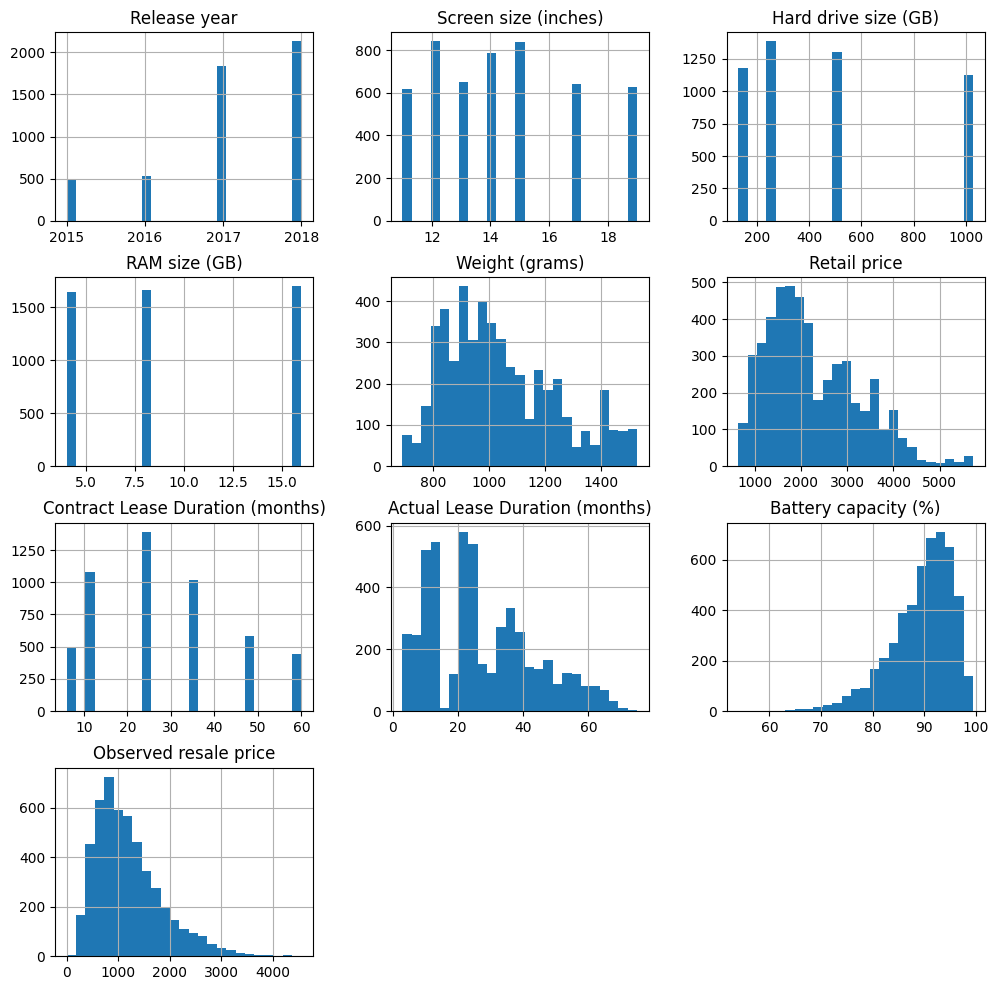

In [8]:
data.hist(figsize=(12, 12), bins=25);

### Correlation matrix

Next, we navigate to the realm of correlation heatmaps, which allow us to visualize the correlation matrix. Imagine being able to see, at a glance, how all the features in our dataset interact with one another. Are certain variables strongly positively correlated? Are others inversely related? These relationships, often non-discernable from raw numbers, become strikingly clear with a correlation heatmap. This step is invaluable, as understanding feature relationships can guide our feature selection and provide insights into the potential collinearity in our models.

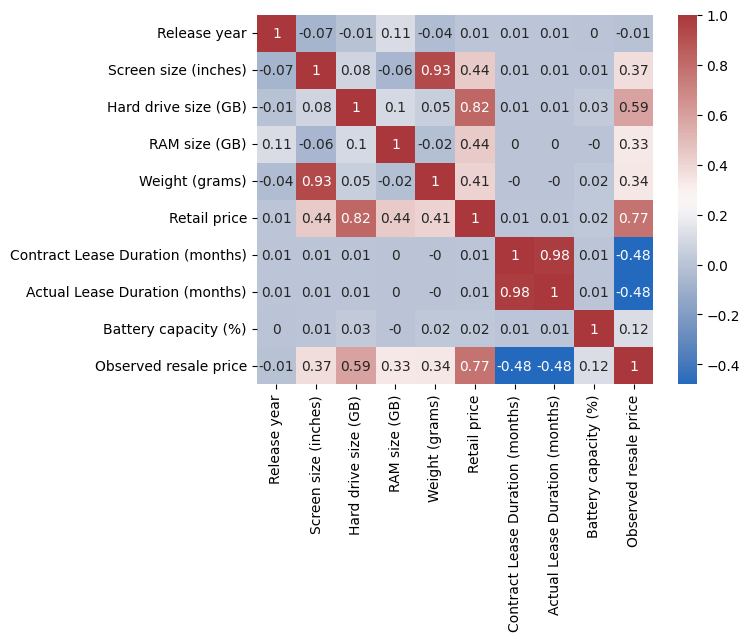

In [9]:
# Recall that our data has both, numerical (e.g. price) and categorical (e.g., brand) information.
# Correlation is defined for numerical data only. Therefore, we first extract only the numerical
# columns from the data frame
numeric_data = data.select_dtypes(include=['number'])

# compute correlations
correlations = numeric_data.corr().round(2)  # note the beauty of pandas. We just 'ask' our data frame to give us 
                                     # the correlations among features; very easy-to-read code     
# plot correlation heatmap
sns.heatmap(correlations, cmap='vlag', annot=True);

In [10]:
# Correlations of features with target:
print(correlations['Observed resale price'].iloc[:-1])

Release year                       -0.01
Screen size (inches)                0.37
Hard drive size (GB)                0.59
RAM size (GB)                       0.33
Weight (grams)                      0.34
Retail price                        0.77
Contract Lease Duration (months)   -0.48
Actual Lease Duration (months)     -0.48
Battery capacity (%)                0.12
Name: Observed resale price, dtype: float64


Interpretation:

- Correlation ranges from -1 to 1, with 1 indicating a perfect positive relationship, 0 indicating no relationship and -1 indicating a perfect negative relationship.
- Unsurprisingly, the original list price has a high positive relationship with the resale price.
- But there are other factors that are correlated, such as, most prominently, hard drive size.
- The duration of the lease has a negative relationship with the resale price. This also comes as no surprise.
- It is noteworthy that the correlations of contract and actual lease duration are the same and that both features have correlation of 0.98 with each other (see correlation heatmap). This suggests that possible discrepancies might only be random noise and that one of the features is a candidate for removal.

---


# Section 2: Explanatory Model

As we transition into Section 2, we shift our focus from exploration to explanation. Explanatory modeling refers to the process of establishing a statistical relationship between different variables in our dataset. Unlike predictive modeling, the primary goal here is not to make predictions on unseen data but to understand the relationships within the data we have. In this section, we'll utilize statsmodels to fit a regression model, enabling us to analyze how our independent variables affect the dependent variable. We'll delve into interpreting the summary() output, understanding key statistics, and analyzing residuals to assess the fit of our model. This insight is not just crucial for data science but invaluable across various research fields.

## Run linear regression using statsmodels

In [11]:
import statsmodels.api as sm

# Define the feature and target variables
X = data.drop(columns='Observed resale price').select_dtypes(include=['number'])
y = data['Observed resale price']

In [12]:
# Create and fit a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()  # Add a constant (intercept) to the features

In [13]:
# Show summary of the linear regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Observed resale price   R-squared:                       0.868
Model:                               OLS   Adj. R-squared:                  0.868
Method:                    Least Squares   F-statistic:                     3657.
Date:                   Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                           15:20:27   Log-Likelihood:                -34403.
No. Observations:                   5000   AIC:                         6.883e+04
Df Residuals:                       4990   BIC:                         6.889e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Interpretation:
- First and foremost, the R-squared value holds a prominent position. This statistic reveals the percentage of the dependent variable's variation that the model explains, essentially serving as a gauge for the model's predictive power. A higher R-squared value indicates a better fit between the model's predictions and the actual data, though it's vital to balance this with the model's complexity.
- Another crucial section in the summary output is the Coefficient Table. Here, the primary focus is on the p-values listed under "P > |t|". These values help determine the significance of each independent variable in predicting the dependent variable. In general, a low p-value (commonly less than 0.05) suggests that a particular variable significantly influences the dependent variable. Meanwhile, the "coef" column shows the expected change in the dependent variable for a one-unit change in the predictor, assuming all other variables are held constant.
- The F-statistic and its associated p-value, Prob (F-statistic), also warrant your attention. The F-statistic evaluates the overall significance of your model, testing the hypothesis that all regression coefficients are zero. A low p-value here is a green light, indicating that your predictors are jointly statistically significant in explaining the variance in the dependent variable.
- Finally, the Cond. No. or Condition Number checks for multicollinearity, a state where predictor variables are highly correlated. A high condition number suggests potential multicollinearity issues, which can destabilize your coefficients and standard errors.

## Plot Residuals

In the realm of regression analysis, residuals hold a position of undeniable importance. A residual represents the difference between an observed value and the value predicted by the model. In essence, it's the unexplained or leftover variation in the dependent variable after the model has done its work.

But why are residuals so important? They're the primary source of information about the fit and adequacy of the regression model. If a model fits well, the residuals should be randomly dispersed and resemble a normal distribution — they should show no discernible patterns. However, if the residuals do exhibit patterns (such as forming a curve or displaying unequal variance across the plot), this suggests that the model is not capturing some important information, and an adjustment or a different modeling approach may be needed.

This is where residual plots come into play. A residual plot is a graphical representation that displays the residuals on the vertical axis and the independent variable or predicted values on the horizontal axis. By visualizing these residuals, we can more easily identify patterns and specific data points that do not follow the trend.

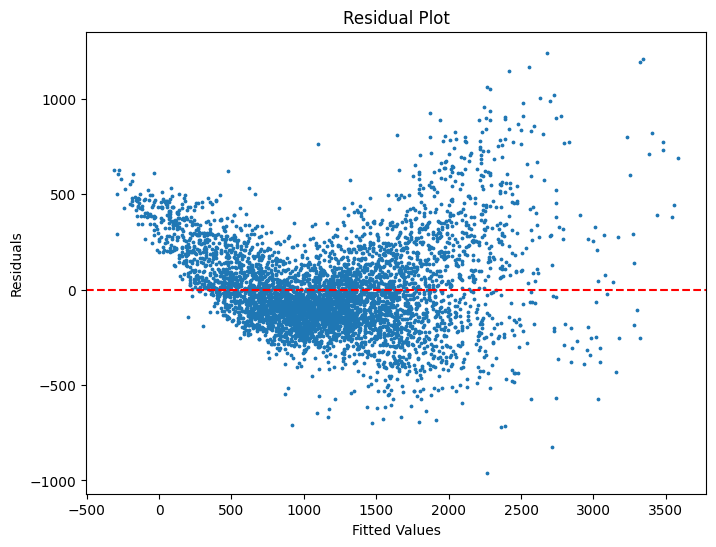

In [14]:
# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid, s=3)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Interpretation:

- Indicates non-linearity: A U-shaped pattern in residuals suggests the actual relationship between variables isn't linear.
- Model inadequacy: The current model fails to capture the curve in the data, systematically overestimating or underestimating values.
- Potential remedies: Consider polynomial regression, variable transformations, or a more complex, non-linear model.

---



# Section 3: Predictive Modeling

Entering Section 3, we embark on the realm of Predictive Modeling, a statistical technique often synonymous with machine learning. Here, our goal transcends merely understanding our data; we aim to make accurate predictions on new, unseen data. This section will introduce you to two of the most popular tools in machine learning - a Linear Regression model using sklearn and a more complex, gradient boosting model using XGBoost. You'll learn how to prepare your data by performing a train-test split, fit a regression model, and fine-tune an XGBoost model using k-fold cross-validation and grid search. By the end of this section, you'll have foundational yet powerful tools in your data science arsenal, ready to tackle real-world predictive tasks.

## Linear Regression

We start by applying Linear Regression, one of the most fundamental and widely-used statistical techniques in the field of machine learning. Linear regression focuses on establishing a linear relationship between a dependent variable and one or more independent variables. It's based on the principle of fitting a linear equation to the observed data in such a way that you can use this equation to predict values for new data, not seen before.

However, the key to effective predictive modeling is not only in how well we fit our model to the data but also in how well our model generalizes to new, unseen data. This is where the concept of train-test split comes into play. This technique involves dividing our dataset into two subsets:

- **Training set**: A portion of the data used to train the model. The model sees and learns from this data.
- **Testing set**: A portion of the data unseen by the model during training, used to test how well the model performs on new data.

This separation is crucial for assessing our model's performance and robustness because it ensures that we have a reserved dataset that the model hasn't seen before, simulating how the model is expected to perform in real-world scenarios. It protects against overfitting – a common pitfall where a model performs well on the training data but poorly on new, unseen data – ensuring that our model is not only accurate but also reliable and generalizable.

In [15]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# This code splits the dataset into training and testing sets, with `X` representing the input features and `y` representing the target variable. 
# The split ratio is 80% for training and 20% for testing, and the `random_state=42` ensures reproducibility of the split.

In [16]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression().fit(X_train, y_train)
lr_predictions = linear_regression.predict(X_test)

But our journey doesn't end with computing model predictions, we also want to evaluate the model's predictive power. To accomplish this, we'll assess the quality of these predictions using a popular metric known as the Root Mean Squared Error (RMSE). RMSE is a standard way to measure the difference between predicted and actual values obtained by a model.

In [17]:
# Compute Root Mean Squared Error (RMSE) for the linear model
from sklearn.metrics import mean_squared_error

lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)

print('Linear Regression RMSE: {:.2f}'.format(lr_rmse))

Linear Regression RMSE: 238.84


## XGBoost

As we venture deeper into the realm of machine learning, we encounter powerful algorithms that have gained popularity for their performance and versatility, one of which is XGBoost. XGBoost, short for eXtreme Gradient Boosting, is an advanced implementation of gradient boosting designed for speed and performance.

So, what is gradient boosting? At its heart, it's a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weaker prediction models, typically decision trees. It builds the ensemble in a stage-wise fashion where models are added sequentially until no further improvements can be made.

XGBoost is widely used in machine learning competitions and real-world applications, not only because of its speed and performance but also because it has proven to be a highly accurate learning algorithm. It's versatile – it supports regression, classification, ranking, and user-defined prediction problems.

In [18]:
# Create an XGBoost regressor
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()

When working with more complex models like XGBoost, several parameters need fine-tuning to enhance the model's predictive performance. In the case of XGBoost, three pivotal ones are:

1. **Tree Depth**: This represents the depth of the decision trees in the ensemble. Deeper trees can capture more complex patterns by adding more decision nodes, but they also risk overfitting to the training data. Conversely, shallower trees might underfit, missing crucial information.
   
2. **Learning Rate**: This is a crucial hyperparameter that controls the impact of each additional tree on the final outcome in the boosting process. A smaller learning rate means the model is more robust to overfitting, training more slowly and requiring more trees to model all relations between features and targets. A larger one leads to faster training, but it can overshoot the optimal point.
   
3. **Number of estimators**: This denotes the number of trees you want to build. In general, a higher number of trees increases the model's performance, but after a certain point, the benefit in prediction performance becomes negligible, and it might overfit to the data.

Adjusting these parameters requires a systematic approach, and this is where grid search comes into play. Grid search is a method for hyperparameter tuning that involves constructing multiple versions of the model, each with a different combination of settings, and selecting the combination that performs the best. In simpler terms, imagine trying every spot on a grid for the best view of a landscape, rather than just guessing and checking random spots.

However, how do we ensure that the combination selected is truly the best and not just lucky due to some quirk in the way we split our data? This brings us to k-fold Cross-Validation (CV).

k-fold CV is a resampling procedure used to evaluate a model on a limited data sample. The process divides the dataset into k number of subsets (or folds) of equal size. It then iteratively trains the model k times, each time training the data on k-1 of the folds and evaluating it on the kth fold. After running these iterations, the results are averaged to provide a single estimation. The primary reason for using this method is to limit problems like overfitting or underfitting and get a sense of how the model will generalize to an independent dataset.

In our case, we're using a 5-fold CV. This means each dataset is split into 5 parts, the model is trained on 4 parts and validated on the remaining part, iteratively.

Combining grid search with cross-validation provides a robust method for optimizing a model's hyperparameters. We're not only searching for the best parameters, but we're also ensuring they produce a model that generalizes well.

In [19]:
# Perform grid search with cross-validation to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for the grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Set the number of cross-validation folds
cv_folds = 5

In [20]:
# Run the grid search using sklearn's built-in GridSearchCV function
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=cv_folds).fit(X_train, y_train)

With the completion of our grid search and cross-validation process, we have navigated through the extensive landscape of potential models, each defined by a unique set of hyperparameters. Now, we arrive at a crucial juncture: extracting the most competent performer, the best XGBoost model, from our grid search ensemble. This model represents the optimal combination of hyperparameters, fine-tuned for performance and generalizability, as determined by our rigorous validation strategy.

But our journey doesn't end with identifying the best model; we need to evaluate its predictive power. To accomplish this, we'll once again compute the RMSE. Remember, a lower RMSE signifies better performance, but the context matters! It's vital to understand that the RMSE is problem-specific — meaning it's only comparable between models trained and tested on the same dataset. We can't compare the RMSE of a model predicting, say, house prices with one predicting temperatures, as the scales of the target variables differ significantly. Moreover, an RMSE's value only becomes meaningful when compared against the actual range of values in the target variable or against a baseline model's RMSE for the same problem. So, while a lower RMSE indicates a stronger predictive ability, its absolute value is less informative than its relative value when compared to other models tackling the same task.

As we proceed, we'll not only see these concepts in action but also learn how to make informed decisions based on these computational evaluations, keeping in mind the specificity and context-dependency of our performance metrics.

In [21]:
# Get the best XGBoost model from the grid search
best_xgb_model = grid_search.best_estimator_

# Use the best XGBoost model to make predictions on the test set
xgb_predictions = best_xgb_model.predict(X_test)

# Compute RMSE for the XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

# Print the RMSE
print('XGBoost RMSE: {:.2f}'.format(xgb_rmse))

XGBoost RMSE: 95.07



Interpretation:

- Performance Disparity: The XGBoost model significantly outperformed the Linear Regression model, with RMSE values of 97.11 and 238.84 Euros, respectively, indicating that XGBoost predictions are, on average, closer to the actual resale prices.
- Non-linear Complexity: The lower RMSE of XGBoost suggests it effectively captured non-linear relationships that the Linear Regression model, constrained by its linearity, couldn't grasp, leading to more accurate predictions.
- Simplicity vs. Accuracy Trade-off: The linear mnodel's higher RMSE highlights a trade-off between model simplicity and predictive accuracy. While Linear Regression is easier to implement and interpret, XGBoost's superior performance may justify its increased complexity.

---


# Section 4: Post-hoc Analysis

In our final section we'll dissect our models post-training to understand not just what predictions a model makes, but how and why it makes them. This section emphasizes the importance of model interpretability, an often overlooked aspect of machine learning. We'll compare feature importance between our models using XGB feature importance and Linear Regression coefficients, helping us understand which variables our models deem most significant. Additionally, we'll dive into Partial Dependence Plots (PDPs) for nuanced insight into how specific features influence our model's predictions across different models. This section underscores that our job doesn't end at model training; understanding and interpreting our models is equally, if not more, important.

## XGBoost feature importance

In the realm of machine learning, the journey doesn't end once a model is trained and its performance evaluated; understanding what drives predictions is crucial, especially in applications demanding interpretability and transparency. This is where the concept of feature importance in XGBoost becomes invaluable. Feature importance provides insights into the trained model by indicating how much each feature contributed to the model's predictions, whether in terms of improving accuracy, reducing impurity, or another metric.

One critical metric here is "gain," which refers to the improvement in accuracy brought by a feature to the branches it is on. The higher the gain score, the more essential the feature is in contributing to the model's predictive power. Gain is calculated as the total gain of a feature's splits, averaged over all the trees in the model.

The Python XGBoost implementation allows us to extract importance scores for each feature, allowing us to see which variables are most influential in predicting the target variable. This information is vital for several reasons: it contributes to a better understanding of the underlying data and the model, it identifies potential areas of focus for feature engineering, and it enhances the interpretability of the model by highlighting the significant features.

In [22]:
# Extract feature importances from the XGBoost model
feature_importances = best_xgb_model.get_booster().get_score(importance_type='gain')

Now we can visualize the feature importances as a bar plot:

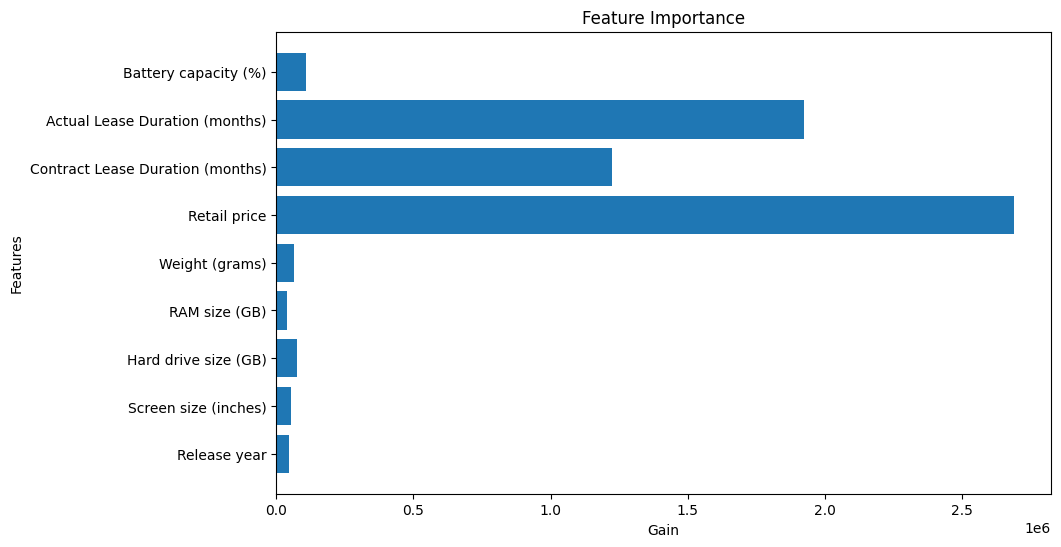

In [23]:
# Create lists of feature names and corresponding gains
features = list(feature_importances.keys())
gains = list(feature_importances.values())

# Create a bar plot
plt.figure(figsize=(10, 6))

# Using barh to create a horizontal bar plot
plt.barh(features, gains)
plt.title('Feature Importance')
plt.xlabel('Gain')
plt.ylabel('Features')

# Show plot
plt.show()

## Linear Regression coefficients

To compare feature importance between the XGBoost model and Linear Regression, you can create a similar plot for the Linear Regression model and visually compare the two. In Linear Regression, each feature variable is associated with a coefficient. These coefficients represent the mean change in the target variable for one unit of change in the feature variable while holding other features in the model constant. In simpler terms, they signify the strength and type (positive or negative) of the relationship between a feature and the target variable.

For instance, in the context of predicting laptop resale prices, since the coefficient for Battery capacity is positive, it implies that larger Battery capacities are, on average, associated with higher resale prices, all else being equal. The magnitude of the coefficient indicates the size of this effect.

However, it's vital to approach these coefficients with caution. A larger coefficient does not necessarily mean a feature is more important, as the scale of the variables involved can also influence the coefficient size. Standardizing features or interpreting coefficients in the context of their variables' scales is essential for a more accurate understanding.

In [24]:
# Extract feature coefficients from the Linear Regression model
feature_coefficients = linear_regression.coef_

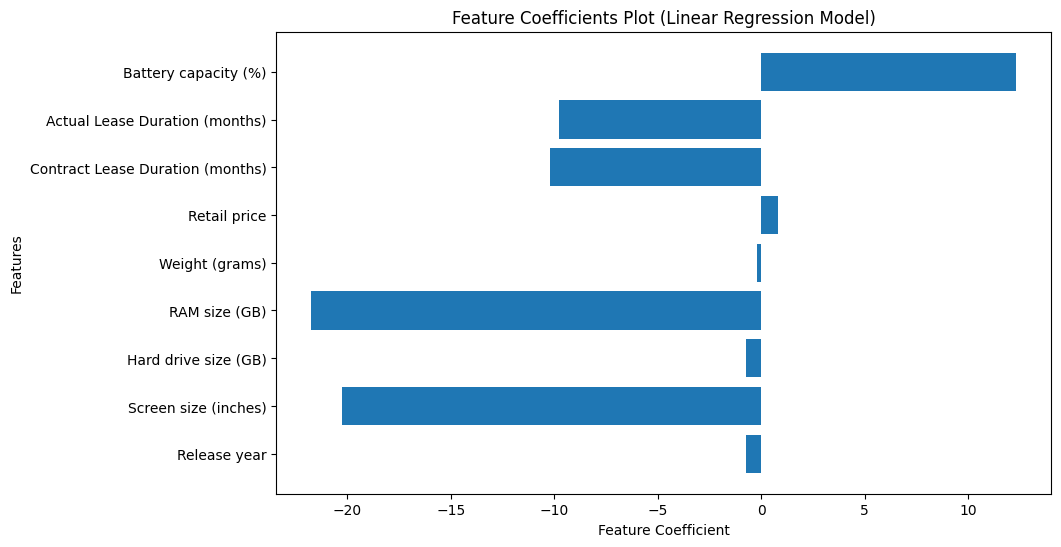

In [25]:
# Create a coefficient bar plot for Linear Regression
plt.figure(figsize=(10, 6))

plt.barh(range(len(feature_coefficients)), feature_coefficients, tick_label=X.columns)
plt.title('Feature Coefficients Plot (Linear Regression Model)')
plt.xlabel('Feature Coefficient')
plt.ylabel('Features')

plt.show()

Take some time to examine and think about the above plot. In general, results like the above one should enable you to tell a story. While this is just another way to visualize results already seen further up before, ask yourself (again) what conclusions you could draw from the plot. In fact, you should also stumble upon some coefficients, which look odd. Which are those and why do they look odd? And what might be the source of the problem?

## Partial Dependence Plot

Partial Dependence Plots are a visualization tool used for exploring the relationship between a set of features and the predictions of the machine learning model while averaging out the effect of other features. These plots allow us to visualize how changes in a feature's values affect the predictions of the model, assuming that all other features remain constant. This is especially valuable when dealing with complex models like ensemble trees or neural networks, where it's not immediately clear how a model arrives at its predictions.

The power of PDPs extends beyond just interpretation; they help in validating whether the model's behavior aligns with domain knowledge, identifying potential areas for feature engineering, and detecting regions in the feature space where the model might underperform or be overly confident.

In the following, we're going to generate Partial Dependence Plots for our models. We'll analyze how the screen size in inches impacts our resale price predictions, providing us with deeper insights not just into our data, but also into the model's inner workings.

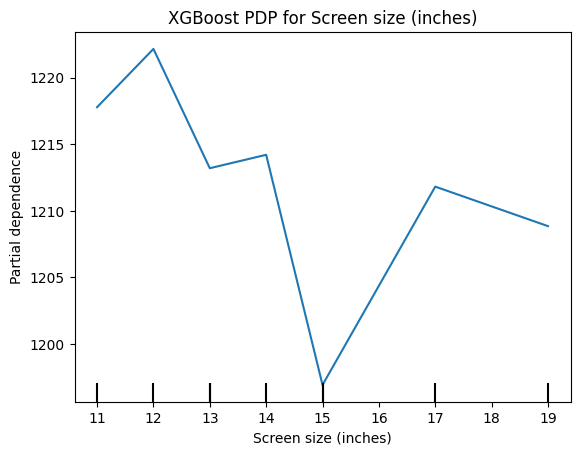

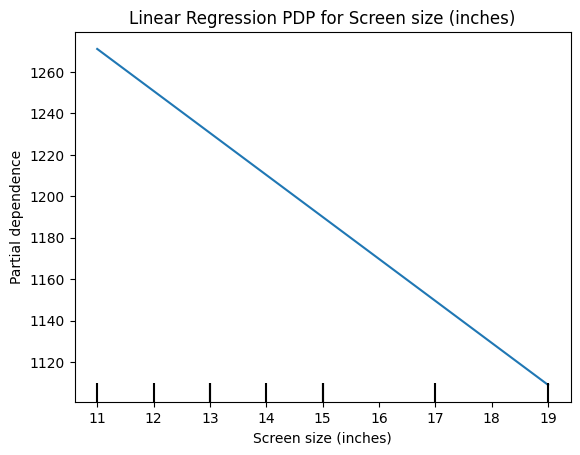

In [26]:
# Import the necessary libraries for partial dependence display
from sklearn.inspection import PartialDependenceDisplay

# Select the feature you want to analyze (e.g., 'MedInc')
feature_to_plot = 'Screen size (inches)'

# Create a PartialDependenceDisplay object for XGBoost model
xgb_partial_dependence_display = PartialDependenceDisplay.from_estimator(
    best_xgb_model, X_train, features=[feature_to_plot]
)
plt.title(f'XGBoost PDP for {feature_to_plot}')
plt.show()

# Create a PartialDependenceDisplay object for Linear Regression model
linear_partial_dependence_display = PartialDependenceDisplay.from_estimator(
    linear_regression, X_train, features=[feature_to_plot]
)
plt.title(f'Linear Regression PDP for {feature_to_plot}')
plt.show()

# Exercises

Now that we've journeyed through data exploration, explanatory and predictive modeling, and post-hoc analysis, it's your turn to solidify this knowledge through practice. This exercise section is designed to challenge your understanding, encourage your curiosity, and hone your coding skills. You'll engage with the concepts and code you've seen, manipulate them, and observe the outcomes. Remember, theoretical knowledge becomes valuable when applied, and these exercises offer you the perfect opportunity to transition from learner to practitioner.

#### Q: What are the Linear Regression RMSE scores when you change the train-test ratio to more than 0.2 and less than 0.2?

> Hint: Update the train_test_split() function

#### Q: What is the XGBoost RMSE score when you drop the less important features?

> Hint: Check the Feature Importance Plot of the XGBoost model

#### Q: What does the PDP look like for lease duration and hard drive size?

> Hint: Check the Partial Dependence Display